# Statistical Shape Modelling & Inference (Assignment 2 & Assignment 3)

Importing requried libraries.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Asignment 2
- In statistical shape modelling, we first calculate the mean shape.
- Then find the covariance matrix of the points.
- Then we find the eigen value and eigen vector subspace. 
- Finally we caclulate phi which represents set of eigen vectors.

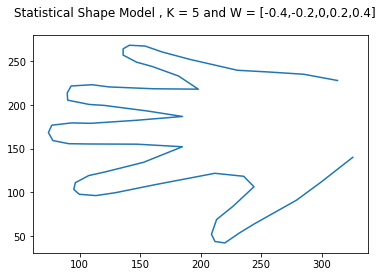

In [3]:
'''
QUESTION 2
'''
'''
Read the data.
'''
data = np.loadtxt('data/hands_aligned_train.txt',skiprows=1)
'''
Caclulate mu
'''
mu=np.mean(data,axis=1)
'''
Calculate W = w-mu
'''
W = data - mu.reshape(-1,1)
'''
Caclulate covariance matrix W.Wt
'''
cov = np.cov(W)
'''
Find the eigen vectors and eigen value of covariance matrix
'''
eigen_value,eigen_vectors=np.linalg.eig(cov)
'''
Take the first 5 eigen vectors and find phi and sigma square.
'''
K=5
sigma_square = 1/(112-K)*(np.sum(eigen_value[K+1:]))
L2 = np.diag(eigen_value)
second = L2[:K,:K] - sigma_square*np.eye(K,K)
phi = np.dot(eigen_vectors[:,:K],np.sqrt(second))
'''
Calculate wi with the weights given in the sheet.
'''
wi=(mu + np.dot(phi,np.array([-0.4,-0.2,0,0.2,0.4])).real)
'''
Plot the wi.
'''
plt.suptitle("Statistical Shape Model , K = 5 and W = [-0.4,-0.2,0,0.2,0.4]")
plt.plot(wi[:56],wi[56:])
plt.show()
plt.pause(2)
plt.close()

As shown above, we get the transformed hand using the weights.

## Assignment 3

In the inference step we combine the Statistical shape models with ICP.
We use the following approach :
1. Calculate the w = mu + phi.h
2. Find the psuedo inverse components.
3. Caclulate psi based on test points.
4. Transform w using the new psi.
5. Caclulate the components of h.
6. Reiterate if shape not converged.

[-0.69036349 -2.20438239 -2.24082408 -1.38536341  1.82349612]


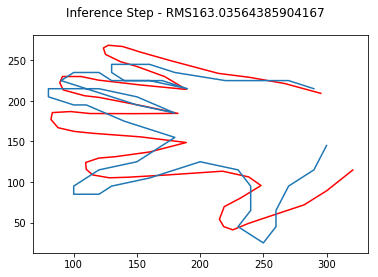

[-0.32635865 -0.49826725 -0.05970978  0.95481052 -0.07318516]


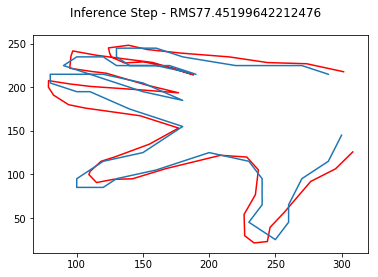

[-0.53549396 -1.89859183 -2.1998935  -1.84020999  1.81081344]


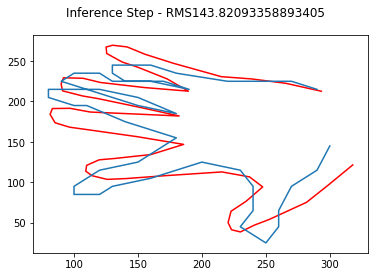

[-0.38715896 -0.67522255 -0.09353588  1.12160094 -0.03141717]


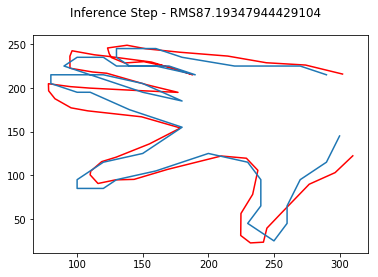

[-0.5044567  -1.78867928 -2.1580744  -1.87882086  1.73072291]


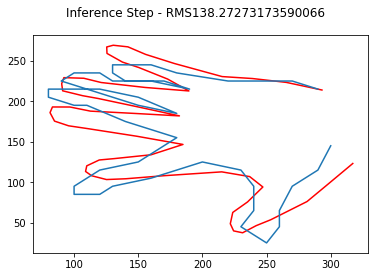

[-0.39868969 -0.75128628 -0.133197    1.09476994  0.05093057]


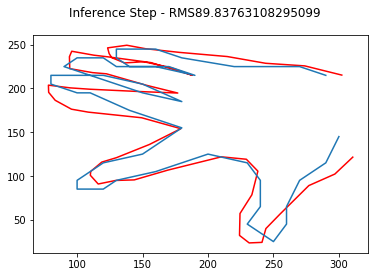

[-0.49562411 -1.73548558 -2.11169983 -1.82097766  1.6333582 ]


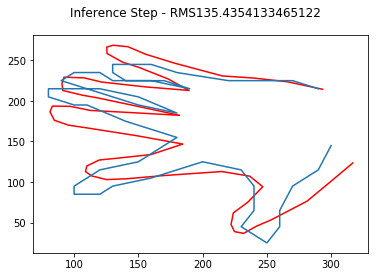

[-0.40131854 -0.79638264 -0.1751365   1.02303609  0.137447  ]


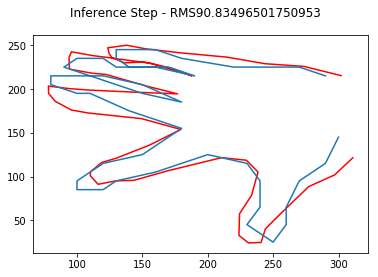

[-0.4909807  -1.69970951 -2.06546437 -1.74269675  1.5407586 ]


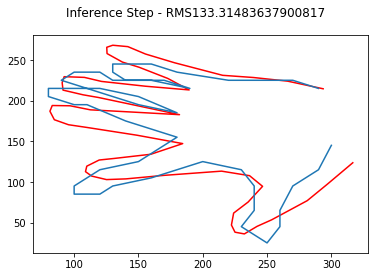

[-0.40248889 -0.83097024 -0.21622592  0.94335921  0.21639123]


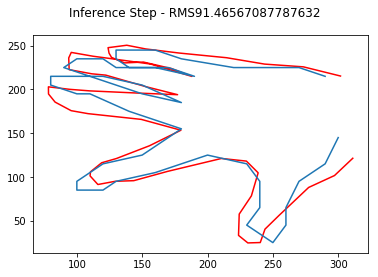

[-0.48721498 -1.67027891 -2.02131182 -1.66268668  1.45860339]


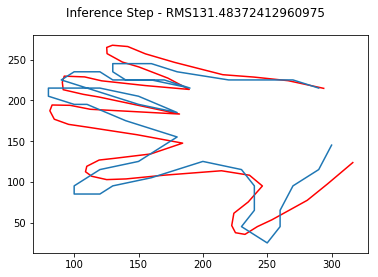

[-0.4035654  -0.86095721 -0.25542417  0.8649807   0.28550992]


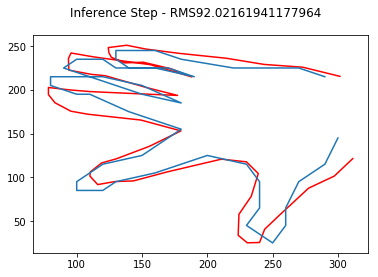

[-0.48370522 -1.64401086 -1.97967466 -1.5855443   1.38713612]


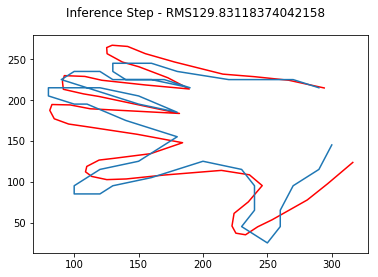

[-0.40476664 -0.88813685 -0.29256087  0.79013201  0.34537995]


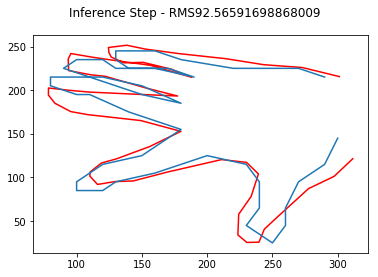

[-0.48034025 -1.61990717 -1.94048373 -1.51229789  1.32519032]


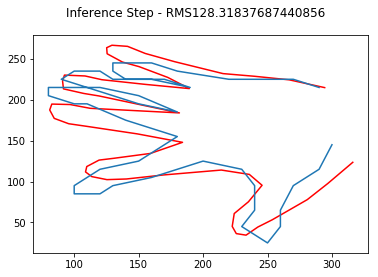

[-0.40609403 -0.91314856 -0.32772906  0.71924442  0.39720472]


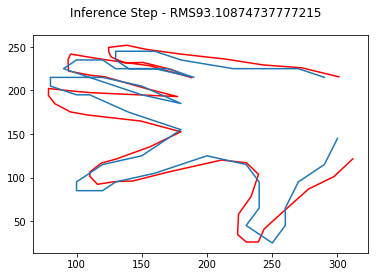

[-0.47710756 -1.59757918 -1.90354624 -1.44306137  1.27140758]


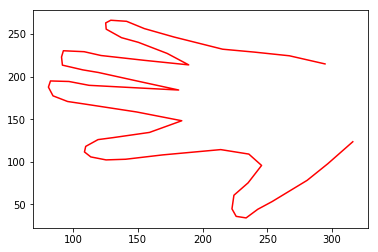

In [6]:

'''
QUESTION 3

'''

'''
Read the test shape
'''
test_shape = np.loadtxt('data/hands_aligned_test.txt',skiprows=1)
h = np.array([0,0,0,0,0]) #Assume random h
h_org = np.copy(h)
count_iter=0
psi=None
A=None
while(True):
    w = mu + np.dot(phi,h) # w
    w=w.real
    '''
    Shape changes to calculate psuedo inverse equation components
    '''
    w_xy = np.array([np.split(w,2)[0],np.split(w,2)[1]]).T
    A= []
    for point in w_xy:
        A = A + [[point[0], point[1], 0, 0, 1, 0]]
        A = A + [[0, 0, point[0], point[1], 0, 1]]
    A = np.array(A)
    test_split = np.split(test_shape, 2)
    y = np.array([test_split[0], test_split[1]]).T.flatten()
    '''
    Calculate transformation vector psi 
    '''
    psi = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
    psi_1 = psi[:4].reshape(2,2)
    psi_2 = psi[4:]
    '''
    Transform points according to psi
    '''
    w = np.dot(A,psi).real
    '''
    Caclulate parts of the h update equation
    '''
    second_term = y - (np.dot(A,psi))
    second_term=np.array(np.split(second_term, 56)).T.flatten()
    second_sum = np.zeros((5,1))
    for n in range(56):
        phi_n=np.array([phi[n, :], phi[n+ 56, :]])
        first_n = np.dot(psi_1,phi_n).T.real
        second_n = np.array([second_term[n],second_term[n+56]]).reshape(-1,1)
        second_sum = second_sum + np.dot(first_n,second_n)

    sum_first = np.zeros((5,5))
    for n in range(56):
        phi_n = np.array([phi[n, :], phi[n + 56, :]])
        sum_first += phi_n.T.dot(psi_1.T).dot(psi_1).dot(phi_n).real
    sum_first = sum_first+ sigma_square*np.eye(5,5)
    sum_first_inv = np.linalg.inv(sum_first)
    '''
    Evalulate h
    '''
    h = np.dot(sum_first_inv,second_sum).real.flatten()

    print(h)
    '''
    Check if iterations are done.
    '''
    if count_iter>15:
        plt.plot(np.array(np.split(w, 56))[:, 0], np.array(np.split(w, 56))[:, 1], c='r')
        plt.show()
        break
    else:
        h_org=h
    count_iter+=1
    '''
    Calculate RMS error
    '''
    RMS = np.sqrt(np.sum(np.square(w-y)))
    plt.suptitle("Inference Step - RMS" + str(RMS))
    plt.plot(np.array(np.split(w,56))[:,0],np.array(np.split(w,56))[:,1],c='r')
    plt.plot(test_shape[:56],test_shape[56:])
    plt.pause(0.2)




As see above, the shape gradually converges toward the given test shape.